negative sentiment - word cloud


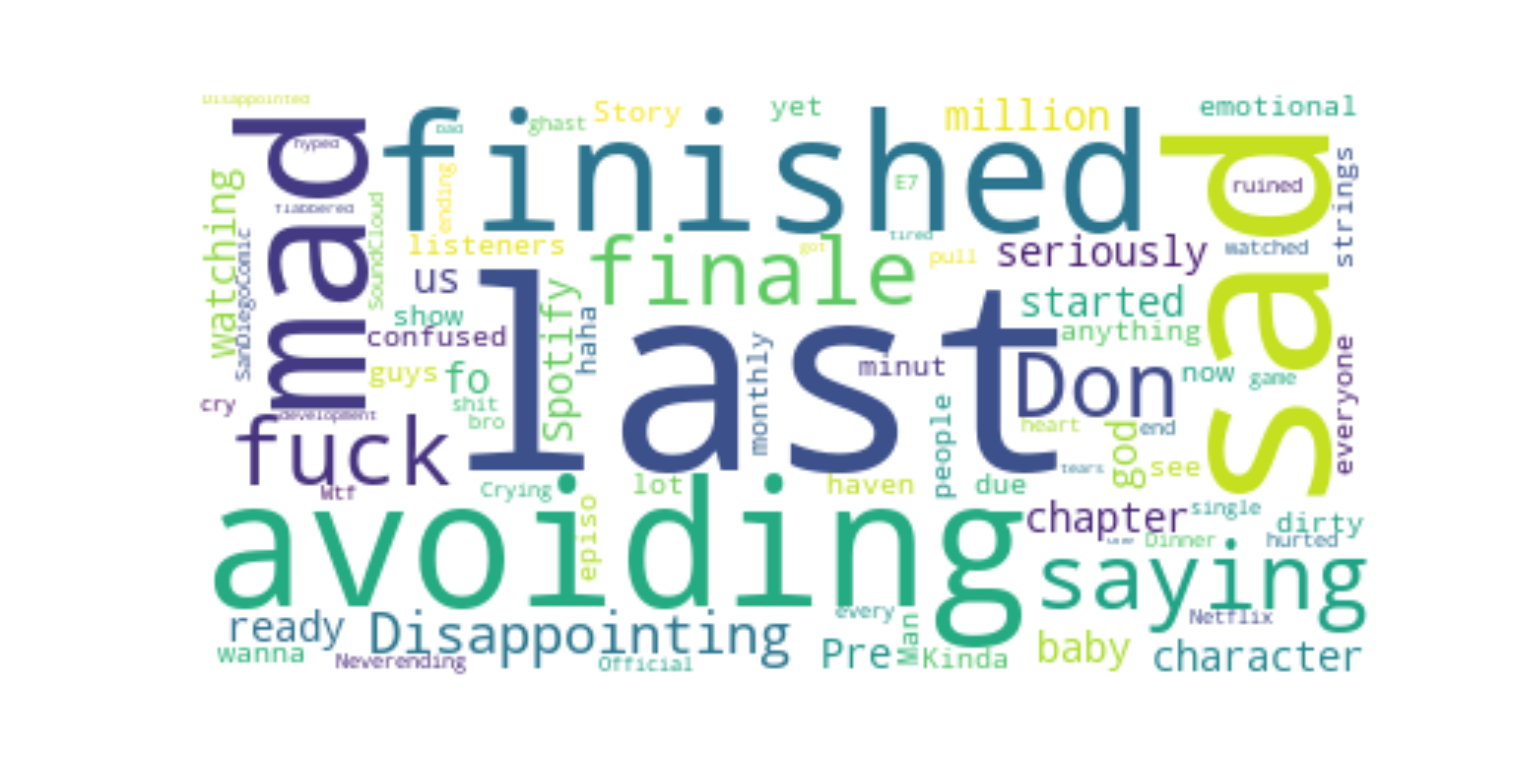

In [4]:
from IPython.display import Image

print("negative sentiment - word cloud")
Image("Figure_3.png")

positive sentiment - word cloud


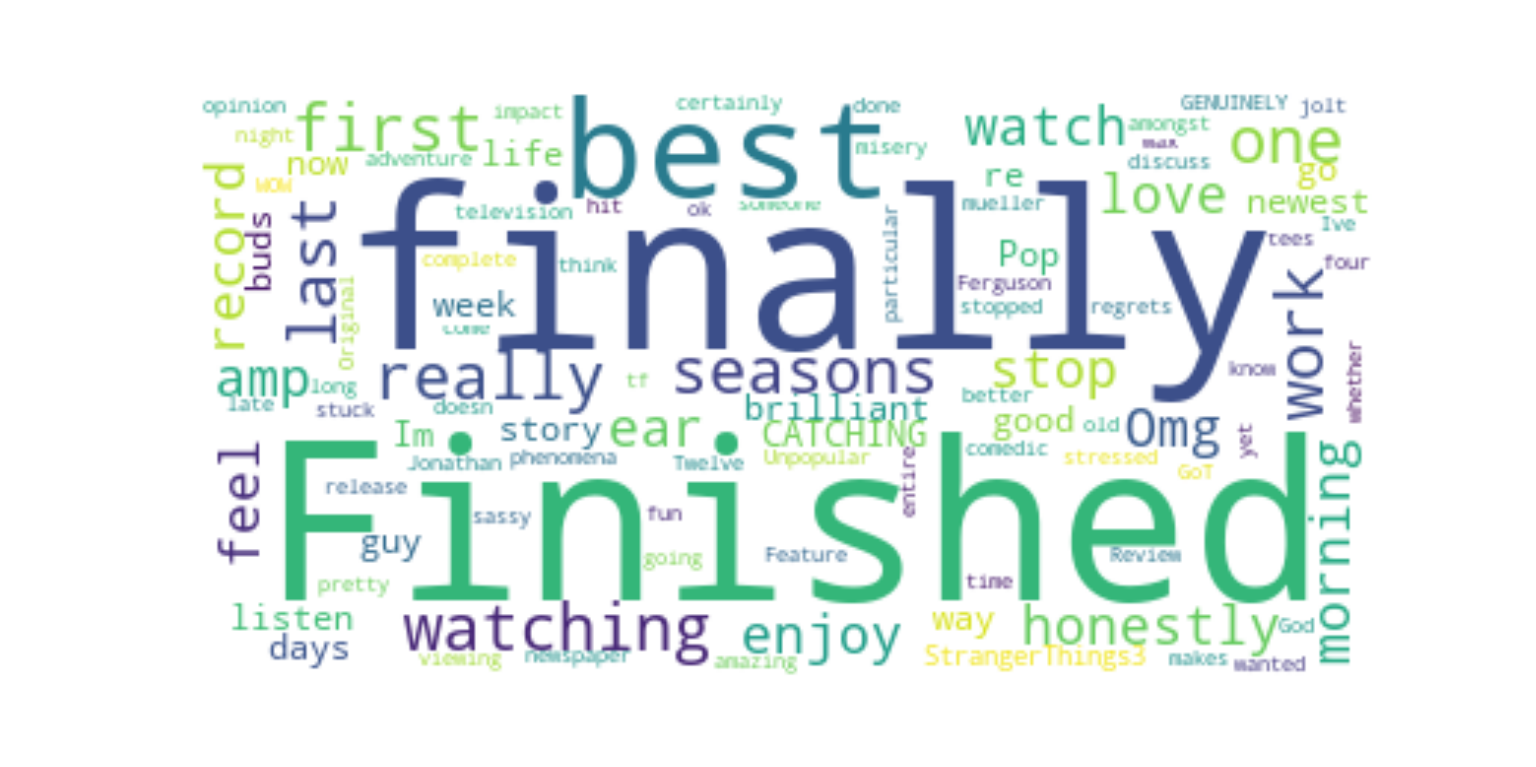

In [5]:
print("positive sentiment - word cloud")
Image("Figure_3-2.png")